### Importing python Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pymatgen.core as pg
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

### Reading .csv files

In [2]:
df = pd.read_excel('Data/Training/Features.xlsx') ## Import the training dataset
df

,Compound,Temperature(K),mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,...,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar
0,AlAs,152.91209,5.720212,3.108624e-15,5.720212,5.720212,2.775558e-16,1.000000,1.000000,0.160958,...,29.5,225,166.0,195.500000,0.222222,0.222222,0.555556,0,1.000000,0.078014
1,AlP,140.72993,5.368858,3.150000e-10,5.368858,5.368858,1.660000e-11,1.000000,1.000000,0.146248,...,225.0,2,113.5,0.500000,0.500000,0.000000,0.000000,1,0.080661,0.040330
2,AlP (F-43m),162.26119,5.720212,1.330000e-15,5.720212,5.720212,5.000000e-16,1.000000,1.000000,0.160958,...,225.0,166,195.5,0.222222,0.222222,0.555556,0.000000,1,0.047247,0.023624
3,AlSb,148.62687,5.720212,0.000000e+00,5.720212,5.720212,2.780000e-16,1.000000,1.000000,0.160958,...,166.0,2,166.0,0.307692,0.307692,0.384615,0.000000,1,0.005609,0.002627
4,B2AsP,142.34014,5.731569,1.021271e-01,5.541343,5.935824,1.160746e-02,0.977966,1.023215,0.160397,...,229.0,166,229.0,0.233333,0.100000,0.666667,0.000000,0,0.285663,0.131096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,TePb,147.79412,6.000000,4.440000e-16,6.000000,6.000000,0.000000e+00,1.000000,1.000000,0.000000,...,166.0,2,166.0,0.307692,0.307692,0.384615,0.000000,1,0.005609,0.002627
115,Ti2SnC,100.70368,9.383733,1.691867e+00,6.000000,11.858700,9.280932e-02,0.814381,1.163322,0.089257,...,194.0,141,194.0,0.307692,0.153846,0.538462,0.000000,0,0.225103,0.077479
116,TlBr,160.52725,11.956922,8.880000e-16,11.956922,11.956922,1.670000e-16,1.000000,1.000000,0.051982,...,166.0,2,84.0,0.500000,0.500000,0.000000,0.000000,1,0.005609,0.002805
117,TlCl,160.26508,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.000000,1.000000,0.051982,...,166.0,64,115.0,0.142857,0.142857,0.714286,0.000000,1,0.033646,0.016823


### 1 .Exploratory Data Analysis:

In [3]:
print('Shape of DataFrame is : ',df.shape)
print('Null entries in DataFrame are : ', df.isnull().sum().sum())
df.dropna(inplace=True)
print('After dropping null values, shape of DataFrame becomes : ',df.shape)

Shape of DataFrame is :  (119, 273)
Null entries in DataFrame are :  1
After dropping null values, shape of DataFrame becomes :  (118, 273)


#### (a) Analysis of Input Features of Compounds

In [4]:
# %matplotlib inline
# count = 0
# plt.figure(figsize=(25,30))
# for i in df.columns[1:51]:
#     count += 1
#     plt.subplot(10,5,count)
#     plt.hist(df[i])
#     plt.plot()
#     plt.title('Feature {}'.format(count))
#     plt.tight_layout()

#### Similarly, We can analyze other features in dataset by changing the range of above loop. There are total 273 features calculated for each inorganic compound. 

### (b) Analysis of Output features of compounds.

In [6]:
# pip install openpyxl
Y = pd.read_excel('Data/Training/Initial Dataset.xlsx')
#Y = Y[df['Temperature(K)']==Y[]]
Y

,Compound,LTC,Temperature(K)
0,AlAs,266.67806,152.91209
1,AlAs,220.88175,159.37363
2,AlAs,175.08544,185.21978
3,AlAs,129.28913,211.06593
4,AlAs,106.39098,243.37363
...,...,...,...
2140,TlI,0.05528,751.19048
2141,TlI,0.04856,818.19728
2142,TlI,0.04184,885.20408
2143,TlI,0.04184,952.21088


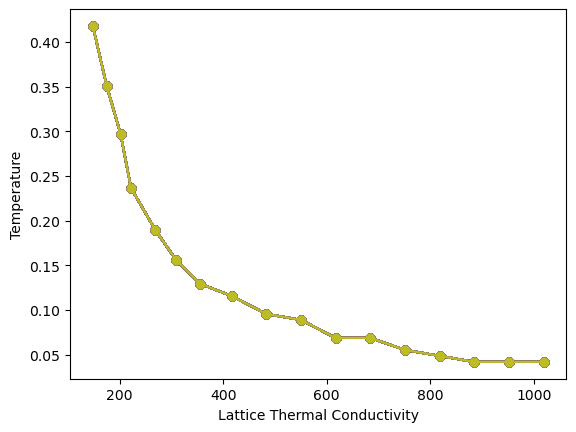

In [8]:
for i in Y['Compound'].unique():
    y = Y[Y['Compound']== 'TlI']['LTC']
    x = Y[Y['Compound']== 'TlI']['Temperature(K)']
    plt.plot(x,y,'-o')
    plt.xlabel('Lattice Thermal Conductivity')
    plt.ylabel('Temperature')
    #plt.legend([i])

In [ ]:
Before_Features = df.drop(['Compound'],axis = 1) ## Drop the compound name and targeted property

In [ ]:
temp = df['Temperature(K)'].to_list()
compound = df['Compound']
ltc = []
for i in range(len(compound)):
    ltc.append(Y[Y['Temperature(K)'] == temp[i]]['LTC'].to_list()[0])
    
#Y = pd.DataFrame(ltc, columns=['LTC'])
Y = ltc

In [ ]:
np.array(Y).shape

(118,)

In [ ]:
## VT Analysis
var_thres = VarianceThreshold(threshold=.8*(1-0.8))
var_thres.fit(Before_Features)
var_thres.get_support()
constant_columns = [column for column in Before_Features.columns if column not in Before_Features.columns[var_thres.get_support()]]
After_Variance = Before_Features.drop(constant_columns,axis=1)

In [ ]:
After_Variance

,Temperature(K),mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,mean_NeighDiff_shell1_Number,var_NeighDiff_shell1_Number,min_NeighDiff_shell1_Number,max_NeighDiff_shell1_Number,range_NeighDiff_shell1_Number,...,most_GSbandgap,maxdiff_GSmagmom,max_GSmagmom,mean_SpaceGroupNumber,maxdiff_SpaceGroupNumber,dev_SpaceGroupNumber,max_SpaceGroupNumber,min_SpaceGroupNumber,most_SpaceGroupNumber,CanFormIonic
1,140.72993,5.368858,3.150000e-10,5.368858,5.368858,1.773368,5.840000e-11,1.773368,1.773368,1.170000e-10,...,0.8125,0.000000,0.000000,113.50,223.0,111.500,225.0,2,113.5,1
2,162.26119,5.720212,1.330000e-15,5.720212,5.720212,1.660958,2.220000e-16,1.660958,1.660958,4.440000e-16,...,0.0000,0.000000,0.000000,195.50,59.0,29.500,225.0,166,195.5,1
3,148.62687,5.720212,0.000000e+00,5.720212,5.720212,31.558208,5.330000e-15,31.558208,31.558208,1.070000e-14,...,1.5240,0.000000,0.000000,125.00,164.0,61.500,166.0,2,166.0,1
4,142.34014,5.731569,1.021271e-01,5.541343,5.935824,16.714650,4.039126e+00,10.520725,24.792902,1.427218e+01,...,0.0000,0.000000,0.000000,212.25,63.0,23.125,229.0,166,229.0,0
5,141.72249,5.731569,1.021271e-01,5.541343,5.935824,16.714650,4.039126e+00,10.520725,24.792902,1.427218e+01,...,0.0000,0.000000,0.000000,173.75,217.0,80.875,229.0,12,229.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,147.79412,6.000000,4.440000e-16,6.000000,6.000000,30.000000,1.780000e-15,30.000000,30.000000,3.550000e-15,...,1.5240,0.000000,0.000000,125.00,164.0,61.500,166.0,2,166.0,1
115,100.70368,9.383733,1.691867e+00,6.000000,11.858700,15.834471,1.531354e-01,15.528200,16.000000,4.718002e-01,...,0.0000,0.000023,0.000023,180.75,53.0,19.875,194.0,141,194.0,0
116,160.52725,11.956922,8.880000e-16,11.956922,11.956922,35.695575,0.000000e+00,35.695575,35.695575,0.000000e+00,...,1.5745,0.000000,0.000000,84.00,164.0,82.000,166.0,2,84.0,1
117,160.26508,11.956922,8.880000e-16,11.956922,11.956922,49.663409,1.420000e-14,49.663409,49.663409,2.840000e-14,...,0.0000,0.000000,0.000000,115.00,102.0,51.000,166.0,64,115.0,1


In [ ]:
## PC Analysis
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    af_corr = dataset.drop(col_corr,axis=1)
    return af_corr

af_both2 = correlation(After_Variance, 0.80)
af_both2.shape

(118, 55)

In [ ]:
af_both2

,Temperature(K),mean_EffectiveCoordination,var_EffectiveCoordination,mean_NeighDiff_shell1_Number,var_NeighDiff_shell1_Number,mean_NeighDiff_shell1_MendeleevNumber,var_NeighDiff_shell1_MendeleevNumber,mean_NeighDiff_shell1_MeltingT,var_NeighDiff_shell1_MeltingT,mean_NeighDiff_shell1_CovalentRadius,...,min_NUnfilled,max_GSvolume_pa,min_GSvolume_pa,most_GSvolume_pa,mean_GSbandgap,maxdiff_GSmagmom,mean_SpaceGroupNumber,maxdiff_SpaceGroupNumber,max_SpaceGroupNumber,CanFormIonic
1,140.72993,5.368858,3.150000e-10,1.773368,5.840000e-11,8.866839,2.920000e-10,546.348032,1.800000e-08,12.413575,...,3,22.570238,16.4800,19.525119,0.81250,0.000000,113.50,223.0,225.0,1
2,162.26119,5.720212,1.330000e-15,1.660958,2.220000e-16,8.304792,8.880000e-16,511.716340,2.840000e-14,11.626708,...,3,31.560000,16.4800,24.020000,0.00000,0.000000,195.50,59.0,225.0,1
3,148.62687,5.720212,0.000000e+00,31.558208,5.330000e-15,9.965750,1.780000e-15,24.656926,3.550000e-15,14.948625,...,3,22.570238,7.1725,7.172500,1.16825,0.000000,125.00,164.0,166.0,1
4,142.34014,5.731569,1.021271e-01,16.714650,4.039126e+00,9.595091,1.426180e-01,1411.074723,1.966817e+02,24.696029,...,3,63.590000,16.3300,63.590000,0.00000,0.000000,212.25,63.0,229.0,0
5,141.72249,5.731569,1.021271e-01,16.714650,4.039126e+00,9.595091,1.426180e-01,1411.074723,1.966817e+02,24.696029,...,3,63.590000,16.7000,63.590000,0.00000,0.000000,173.75,217.0,229.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,147.79412,6.000000,4.440000e-16,30.000000,1.780000e-15,9.000000,8.880000e-16,122.050000,2.130000e-14,8.000000,...,2,22.570238,7.1725,7.172500,1.16825,0.000000,125.00,164.0,166.0,1
115,100.70368,9.383733,1.691867e+00,15.834471,1.531354e-01,26.815644,3.592178e+00,1298.435714,2.917821e+02,44.868376,...,4,33.285000,5.6400,16.690000,1.12400,0.000023,180.75,53.0,194.0,0
116,160.52725,11.956922,8.880000e-16,35.695575,0.000000e+00,14.743824,1.780000e-15,241.488325,1.420000e-14,19.399769,...,1,22.570238,7.1725,14.871369,1.57450,0.000000,84.00,164.0,166.0,1
117,160.26508,11.956922,8.880000e-16,49.663409,1.420000e-14,13.967834,1.780000e-15,314.586655,2.840000e-14,33.367603,...,1,22.175000,18.8575,20.516250,0.00000,0.000000,115.00,102.0,166.0,1


In [ ]:
##Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(af_both2)
df_scaled = pd.DataFrame(df1_scaled)
df_scaled.columns =af_both2.columns

In [ ]:
df_scaled

,Temperature(K),mean_EffectiveCoordination,var_EffectiveCoordination,mean_NeighDiff_shell1_Number,var_NeighDiff_shell1_Number,mean_NeighDiff_shell1_MendeleevNumber,var_NeighDiff_shell1_MendeleevNumber,mean_NeighDiff_shell1_MeltingT,var_NeighDiff_shell1_MeltingT,mean_NeighDiff_shell1_CovalentRadius,...,min_NUnfilled,max_GSvolume_pa,min_GSvolume_pa,most_GSvolume_pa,mean_GSbandgap,maxdiff_GSmagmom,mean_SpaceGroupNumber,maxdiff_SpaceGroupNumber,max_SpaceGroupNumber,CanFormIonic
0,0.061532,0.002126,1.339281e-10,0.010680,3.136153e-12,0.088147,1.286175e-11,0.195124,2.369582e-11,0.106248,...,0.75,0.060268,0.372210,0.113752,0.281727,0.000000,0.417820,0.982379,0.975758,1.0
1,0.084902,0.055344,5.654744e-16,0.008949,1.192168e-17,0.081983,3.911382e-17,0.182506,3.738674e-17,0.099042,...,0.75,0.150917,0.372210,0.155144,0.000000,0.000000,0.843426,0.259912,0.975758,1.0
2,0.070103,0.055344,0.000000e+00,0.469473,2.862277e-16,0.100201,7.840384e-17,0.005050,4.673342e-18,0.129466,...,0.75,0.060268,0.052621,0.000000,0.405080,0.000000,0.477509,0.722467,0.618182,1.0
3,0.063280,0.057065,4.342125e-02,0.240829,2.169062e-01,0.096135,6.281908e-03,0.510181,2.589185e-01,0.218738,...,0.75,0.473892,0.367060,0.519534,0.000000,0.000000,0.930363,0.277533,1.000000,0.0
4,0.062609,0.057065,4.342125e-02,0.240829,2.169062e-01,0.096135,6.281908e-03,0.510181,2.589185e-01,0.218738,...,0.75,0.473892,0.379764,0.519534,0.000000,0.000000,0.730536,0.955947,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.069199,0.097723,1.887749e-16,0.445471,9.558824e-17,0.089608,3.911382e-17,0.040534,2.804005e-17,0.065826,...,0.50,0.060268,0.052621,0.000000,0.405080,0.000000,0.477509,0.722467,0.618182,1.0
114,0.018087,0.610247,7.193288e-01,0.227271,8.223563e-03,0.285020,1.582250e-01,0.469142,3.841120e-01,0.403488,...,1.00,0.168311,0.000000,0.087644,0.389736,0.000011,0.766869,0.233480,0.787879,0.0
115,0.083020,1.000000,3.775498e-16,0.533203,0.000000e+00,0.152610,7.840384e-17,0.084051,1.869337e-17,0.170232,...,0.25,0.060268,0.052621,0.070897,0.545943,0.000000,0.264706,0.722467,0.618182,1.0
116,0.082735,1.000000,3.775498e-16,0.748358,7.625579e-16,0.144098,7.840384e-17,0.110683,3.738674e-17,0.298157,...,0.25,0.056283,0.453846,0.122879,0.000000,0.000000,0.425606,0.449339,0.618182,1.0


In [ ]:
# import warnings
# warnings.filterwarnings("ignore", "is_categorical_dtype")
# warnings.filterwarnings("ignore", "use_inf_as_na")

/raid/phy_aftab/aftab/miniconda3/envs/Lat_RF_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/raid/phy_aftab/aftab/miniconda3/envs/Lat_RF_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


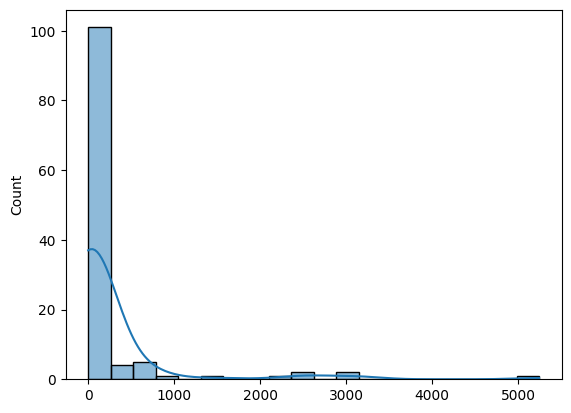

/raid/phy_aftab/aftab/miniconda3/envs/Lat_RF_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/raid/phy_aftab/aftab/miniconda3/envs/Lat_RF_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


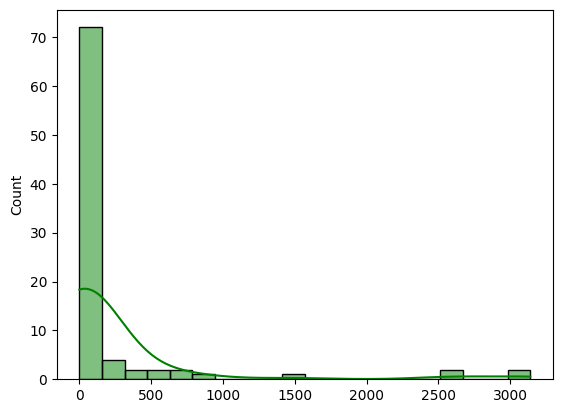

/raid/phy_aftab/aftab/miniconda3/envs/Lat_RF_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/raid/phy_aftab/aftab/miniconda3/envs/Lat_RF_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


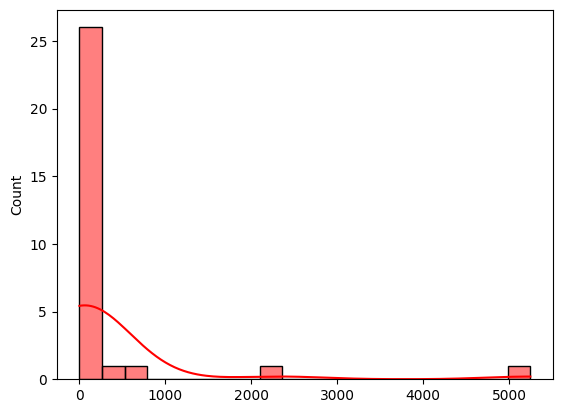

In [ ]:
##Visualizing the split
x,y = df_scaled.to_numpy(),np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=90)
# sns.histplot(data=Y,bins=20,kde=True,legend=True)
# plt.show()
# sns.histplot(data=y_train,color = "g",bins=20,kde=True)
# plt.show()
# sns.histplot(data=y_test,color="r",bins=20,kde=True)
# plt.show()

### 1. Random Forest Algorithm:

In [ ]:
##RF Algorithm
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
print('Training Accuracy: {}'.format(rf_reg.score(X_train,y_train)))
print('Test Accuracy: {}'.format(rf_reg.score(X_test,y_test)))

Training Accuracy: 0.9504484047881625
Test Accuracy: 0.4825082906059581


In [ ]:
#Y = pd.DataFrame(ltc, columns=['LTC'])

In [ ]:
#Y = pd.DataFrame(ltc, columns=['LTC'])
## Repeated K-fold
Y = np.array(Y)
af_both2 = af_both2.to_numpy()
scores = []
counter = 0
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits = 10,n_repeats=10, random_state=30)
for train_index, test_index in fold.split(af_both2):
    counter = counter + 1
    X_train, X_test = af_both2[train_index], af_both2[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    rf_reg.fit(X_train,y_train)
    scores.append(rf_reg.score(X_test,y_test))

In [ ]:
scores

[-8.42470901952625,
 -0.7118534604621132,
 -0.13102968601578535,
 0.6306217385527702,
 0.8015790491179074,
 0.6333111787890666,
 -2.635495877654655,
 0.34825743459803404,
 0.9487718932573084,
 0.8650342573215702,
 0.4794671266357442,
 0.9675711420631373,
 0.7356542208944028,
 -5.3365960127122944,
 -69.41339192561749,
 0.8189701508168937,
 0.857443040539812,
 -14.467880045553272,
 0.10169249478496956,
 -2.4746327495009974,
 0.7795437584839098,
 -1.325110830203052,
 -1.0243414356771052,
 0.3533482049200478,
 -22.12353960332484,
 0.7014482093544998,
 -0.21894365090085355,
 0.9002672351226106,
 0.6254616636233687,
 0.4151276802277978,
 0.35316304664382603,
 -1.0872892230620455,
 0.9692639423242441,
 0.4450727696833545,
 0.8849976652866576,
 0.6526972331419006,
 -1504.525521915468,
 -196.415850840136,
 0.22994092050477066,
 0.49299084229303947,
 -0.22213212499455515,
 0.7504109747669128,
 -1.5892494862965294,
 -36.91774916382564,
 0.5670432257184719,
 -3.5498291613439577,
 -8.16954101209531

### 2. Linear Regression: 

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Training Accuracy: {}'.format(lin_reg.score(X_train,y_train)))
print('Test Accuracy: {}'.format(lin_reg.score(X_test,y_test)))

Training Accuracy: 0.8675745439699287
Test Accuracy: -229.99538542372593


In [ ]:
## Repeated K-fold
#Y = np.array(Y)
#af_both2 = af_both2.to_numpy()
scores = []
counter = 0
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits = 10,n_repeats=10, random_state=30)
for train_index, test_index in fold.split(af_both2):
    counter = counter + 1
    X_train, X_test = af_both2[train_index], af_both2[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lin_reg.fit(X_train,y_train)
    scores.append(lin_reg.score(X_test,y_test))

In [ ]:
scores

[-36.81486120637387,
 -0.19447465935820407,
 -3.985280047555327,
 -0.23097676174114756,
 0.44784730507572124,
 0.5132288837706936,
 -218.63814183134886,
 0.4809327631683965,
 0.5023723273963159,
 0.6706696667146258,
 0.519808321475246,
 0.21522751997512013,
 0.7041851147882006,
 -129.153418409192,
 -746.9529342612542,
 0.4748598295529476,
 0.7169691364266089,
 -14.624863057623806,
 -2.5990995053069414,
 -8.931158571467897,
 -0.3938149776783564,
 -8.685638132305515,
 -8.53302362528235,
 0.6559478737246071,
 -38.53564923061941,
 -0.825634523039261,
 -4.823537194814198,
 0.6570407901383885,
 -19.89532349460512,
 0.024475596252892307,
 -80.72816491600187,
 -202.49499536671368,
 0.4070909258387978,
 0.5089572243430605,
 0.2965095512128002,
 0.3269069884003447,
 -1171.649671531717,
 -274.7595157816979,
 -5.65039420859155,
 -0.6159085774343296,
 -318.29358631149074,
 -0.3673431419992814,
 -14.337513362071027,
 -25.99605870049225,
 0.6327705310678609,
 -4.078558499575258,
 -167.3344047163111,
